<a href="https://colab.research.google.com/github/BROduaga1/Software_Architecture/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Завантаження CSV-файлів
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [64]:
# Об’єднуємо train і test для однакової обробки
full_df = pd.concat([train_df, test_df], sort=False)

# Заповнюємо пропуски
full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
full_df['Fare'].fillna(full_df['Fare'].median(), inplace=True)
full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)

# Створення нових ознак

# Title з імені
full_df['Title'] = full_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
full_df['Title'] = full_df['Title'].replace(
    ['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],
    'Rare')
full_df['Title'] = full_df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
full_df['Title'] = LabelEncoder().fit_transform(full_df['Title'])

# FamilySize + IsAlone
full_df['FamilySize'] = full_df['SibSp'] + full_df['Parch'] + 1
full_df['IsAlone'] = (full_df['FamilySize'] == 1).astype(int)

# Кодування статі та порту посадки
full_df['Sex'] = LabelEncoder().fit_transform(full_df['Sex'])
full_df['Embarked'] = LabelEncoder().fit_transform(full_df['Embarked'])

# Новий список ознак
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone']

X_full = full_df[features]


# Масштабуємо числові значення
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Відновлюємо X_train і X_test
X_train = X_scaled[:len(train_df)]
X_test = X_scaled[len(train_df):]
y_train = train_df['Survived'].values


<ipython-input-64-e0cb1ab29dc1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
<ipython-input-64-e0cb1ab29dc1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [65]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # бо класи 0/1

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
# Робимо передбачення
predictions = model.predict(X_test)
predictions_binary = (predictions > 0.5).astype(int).flatten()

# Готуємо файл submission
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions_binary
})

submission.to_csv("my_submission.csv", index=False)
print("Файл my_submission.csv створено.")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Файл my_submission.csv створено.


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3156 - loss: 0.7977 - val_accuracy: 0.4469 - val_loss: 0.7455
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3675 - loss: 0.7450 - val_accuracy: 0.5307 - val_loss: 0.7015
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5284 - loss: 0.6830 - val_accuracy: 0.6592 - val_loss: 0.6685
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6339 - loss: 0.6532 - val_accuracy: 0.7095 - val_loss: 0.6409
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7194 - loss: 0.6108 - val_accuracy: 0.7374 - val_loss: 0.6163
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7490 - loss: 0.5826 - val_accuracy: 0.7263 - val_loss: 0.5916
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7752 - loss: 0.5615 - val_accuracy: 0.7374 - val_loss: 0.5683
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7957 - loss: 0.5358 - val_accuracy: 0.7486 - val_loss

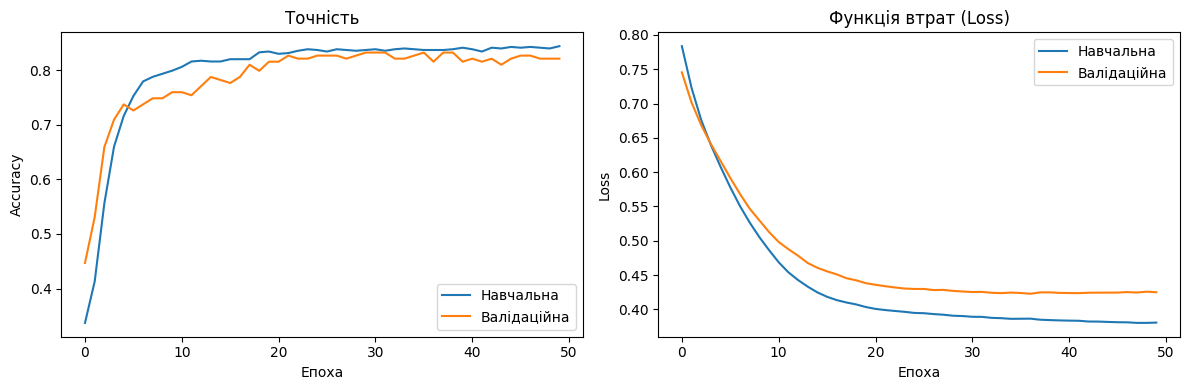

In [67]:
import matplotlib.pyplot as plt


# Зберігаємо історію тренування
history = model.fit(
    X_train_part, y_train_part,
    epochs=50, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Навчальна')
plt.plot(history.history['val_accuracy'], label='Валідаційна')
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Навчальна')
plt.plot(history.history['val_loss'], label='Валідаційна')
plt.title('Функція втрат (Loss)')
plt.xlabel('Епоха')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Показує, наскільки добре модель відрізняє виживших від невиживших. Ідеально — 1.0.

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score

y_val_pred = model.predict(X_val)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)

print("Precision на валідації:", precision_score(y_val, y_val_pred_binary))
print("ROC AUC на валідації:", roc_auc_score(y_val, y_val_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Precision на валідації: 0.8490566037735849
ROC AUC на валідації: 0.8654808959156786


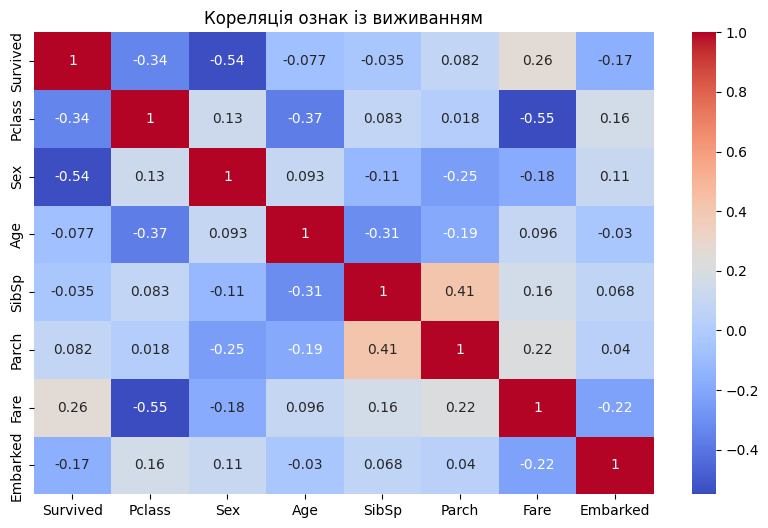

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Додаємо назад ціль до X_train для аналізу
corr_df = train_df.copy()
corr_df['Sex'] = LabelEncoder().fit_transform(corr_df['Sex'])
corr_df['Embarked'] = LabelEncoder().fit_transform(corr_df['Embarked'].fillna('S'))
corr_df = corr_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Кореляційна матриця
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm")
plt.title("Кореляція ознак із виживанням")
plt.show()
